# CIFAR10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
Using device: cpu


## Data Download

In [ ]:
train_dataset_full = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

print(f"Training set size: {len(train_dataset_full)}")
print(f"Test set size: {len(test_dataset)}")

100%|██████████| 170M/170M [00:02<00:00, 63.2MB/s] 


Training set size: 50000
Test set size: 10000


In [ ]:
train_size = int(0.9 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size

train_dataset, val_dataset = random_split(
    train_dataset_full,
    [train_size, val_size]
)

print(f"Training set size after split: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

Training set size after split: 45000
Validation set size: 5000


## Data Loader

In [ ]:
BATCH_SIZE = 128
NUM_WORKERS = 2

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(f"\nCIFAR-10 Classes: {len(classes)} classes")
for i, cls in enumerate(classes):
    print(f"  {i}: {cls}")


CIFAR-10 Classes: 10 classes
  0: plane
  1: car
  2: bird
  3: cat
  4: deer
  5: dog
  6: frog
  7: horse
  8: ship
  9: truck


In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"\nBatch shape - Images: {images.shape}")
print(f"Batch shape - Labels: {labels.shape}")
print(f"Image dimensions: Height={images.shape[2]}, Width={images.shape[3]}, Channels={images.shape[1]}")
print(f"Data type: {images.dtype}")
print(f"Value range - Min: {images.min():.3f}, Max: {images.max():.3f}")


Batch shape - Images: torch.Size([128, 3, 32, 32])
Batch shape - Labels: torch.Size([128])
Image dimensions: Height=32, Width=32, Channels=3
Data type: torch.float32
Value range - Min: 0.000, Max: 1.000


## data labels

In [ ]:
def get_label_distribution(dataset):
    label_counts = np.zeros(10)
    for images, labels in DataLoader(dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
        for label in labels:
            label_counts[label] += 1
    return label_counts

train_label_counts = get_label_distribution(train_dataset)
val_label_counts = get_label_distribution(val_dataset)
test_label_counts = get_label_distribution(test_dataset)

print("\nLabel Distribution:")
print(f"Training set:")
for i, cls in enumerate(classes):
    print(f"  {cls}: {int(train_label_counts[i])} samples")

print(f"\nValidation set:")
for i, cls in enumerate(classes):
    print(f"  {cls}: {int(val_label_counts[i])} samples")

print(f"\nTest set:")
for i, cls in enumerate(classes):
    print(f"  {cls}: {int(test_label_counts[i])} samples")


Label Distribution:
Training set:
  plane: 4501 samples
  car: 4497 samples
  bird: 4547 samples
  cat: 4457 samples
  deer: 4493 samples
  dog: 4472 samples
  frog: 4490 samples
  horse: 4558 samples
  ship: 4502 samples
  truck: 4483 samples

Validation set:
  plane: 499 samples
  car: 503 samples
  bird: 453 samples
  cat: 543 samples
  deer: 507 samples
  dog: 528 samples
  frog: 510 samples
  horse: 442 samples
  ship: 498 samples
  truck: 517 samples

Test set:
  plane: 1000 samples
  car: 1000 samples
  bird: 1000 samples
  cat: 1000 samples
  deer: 1000 samples
  dog: 1000 samples
  frog: 1000 samples
  horse: 1000 samples
  ship: 1000 samples
  truck: 1000 samples


## Data visuals - Denormalize

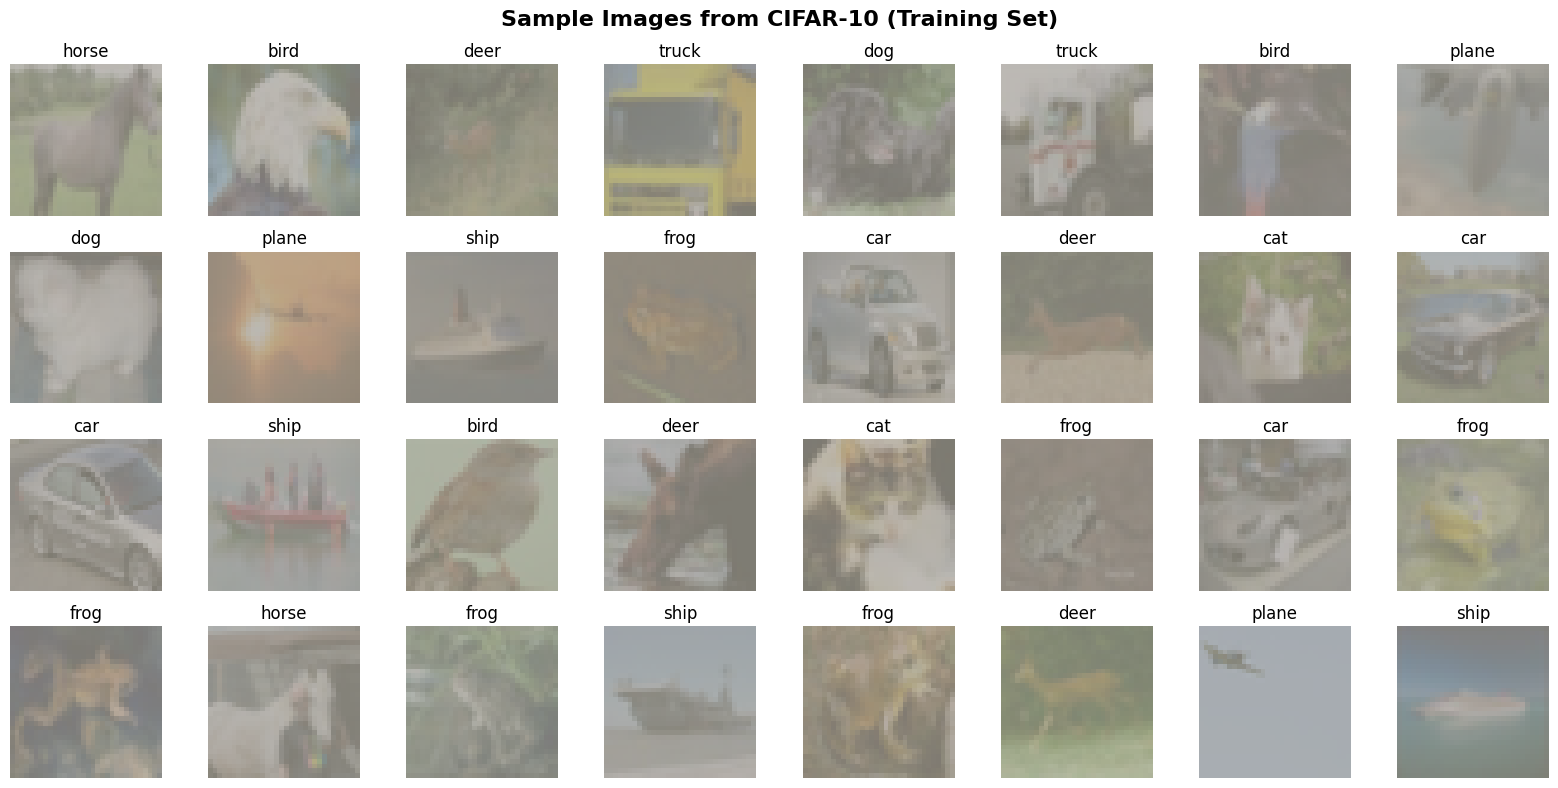

In [ ]:
def denormalize(img):
    img = img * torch.tensor([0.2470, 0.2435, 0.2616]).view(3, 1, 1) + torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
    return torch.clamp(img, 0, 1)

fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Sample Images from CIFAR-10 (Training Set)', fontsize=16, fontweight='bold')

dataiter = iter(train_loader)
images, labels = next(dataiter)

for idx, ax in enumerate(axes.flat):
    if idx < len(images):
        img = denormalize(images[idx])
        img = img.permute(1, 2, 0).numpy()
        ax.imshow(img)
        ax.set_title(classes[labels[idx].item()])
        ax.axis('off')

plt.tight_layout()
plt.show()

## Stats visuals

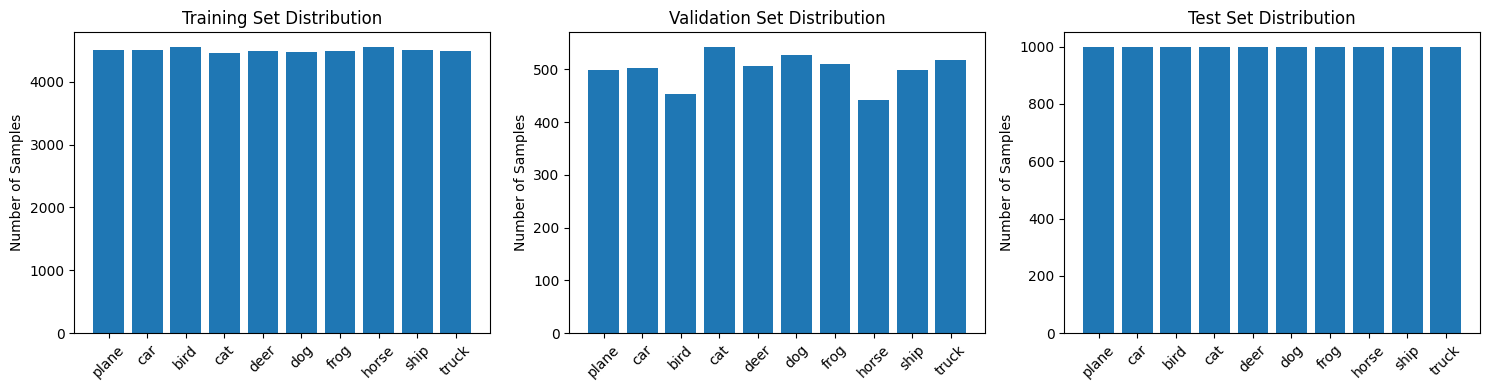

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(classes, train_label_counts)
axes[0].set_title('Training Set Distribution')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(classes, val_label_counts)
axes[1].set_title('Validation Set Distribution')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(classes, test_label_counts)
axes[2].set_title('Test Set Distribution')
axes[2].set_ylabel('Number of Samples')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Visuals- Pixel stats

Mean: 0.4733
Std: 0.2515
Min: 0.0000
Max: 1.0000
Median: 0.4588


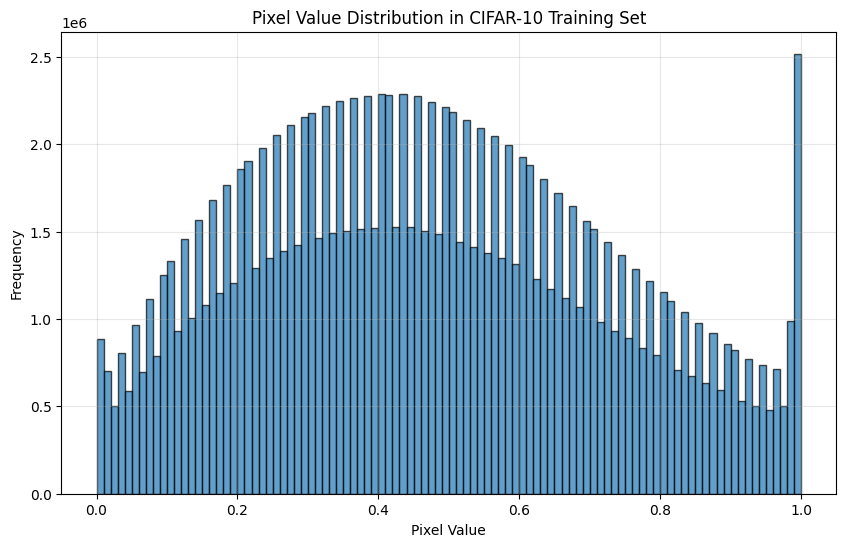

In [ ]:
pixel_values = []
for images, _ in train_loader:
    pixel_values.append(images.view(-1).numpy())

all_pixels = np.concatenate(pixel_values)
print(f"Mean: {all_pixels.mean():.4f}")
print(f"Std: {all_pixels.std():.4f}")
print(f"Min: {all_pixels.min():.4f}")
print(f"Max: {all_pixels.max():.4f}")
print(f"Median: {np.median(all_pixels):.4f}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(all_pixels, bins=100, edgecolor='black', alpha=0.7)
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Frequency')
ax.set_title('Pixel Value Distribution in CIFAR-10 Training Set')
ax.grid(True, alpha=0.3)
plt.show()

## Data summary

In [ ]:
print("\nDataset Summary:")
print(f"Total training samples: {len(train_dataset)}")
print(f"Total validation samples: {len(val_dataset)}")
print(f"Total test samples: {len(test_dataset)}")
print(f"Image size: 32x32 pixels")
print(f"Number of classes: {len(classes)}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")


Dataset Summary:
Total training samples: 45000
Total validation samples: 5000
Total test samples: 10000
Image size: 32x32 pixels
Number of classes: 10
Batch size: 128
Number of training batches: 352
Number of validation batches: 40
Number of test batches: 79


# Edge Impulse

In [ ]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

datasets = {
    'Glass_Breaking': '/kaggle/input/data-obj/detection-of-glass-breaking-of-cars-windshields-windows-thingy_53-export',
    'Object_Detection_Cans': '/kaggle/input/data-obj/ObjectDetection-Cansonconveyorbelt',
    'Object_Detection_Cubes': '/kaggle/input/data-obj/ObjectDetection-Cubescolorsonconveyorbelt',
    'Object_Detection_SelfAttention': '/kaggle/input/data-obj/ObjectDetection-SelfAttention-Cubesonconveyorbelt',
    'Visual_Anomaly_DHT11': '/kaggle/input/data-obj/VisualAnomalyDetection-DHT11'
}

def load_info_labels(dataset_path, split='training'):
    labels_path = os.path.join(dataset_path, split, 'info.labels')
    if os.path.exists(labels_path):
        with open(labels_path, 'r') as f:
            return json.load(f)
    return None


## Obj Detection

In [ ]:
def eda_object_detection(dataset_name, dataset_path):
    print(f"EDA for {dataset_name}")


    # Load train and test
    train_data = load_info_labels(dataset_path, 'training')
    test_data = load_info_labels(dataset_path, 'testing')

    # Parse bounding boxes
    bbox_data = []
    for split_name, data in [('train', train_data), ('test', test_data)]:
        if data is None:
            continue
        for file_info in data.get('files', []):
            img_path = file_info['path']
            for bbox in file_info.get('boundingBoxes', []):
                bbox_data.append({
                    'split': split_name,
                    'image': img_path,
                    'label': bbox['label'],
                    'x': bbox['x'],
                    'y': bbox['y'],
                    'width': bbox['width'],
                    'height': bbox['height'],
                    'area': bbox['width'] * bbox['height'],
                    'aspect_ratio': bbox['width'] / bbox['height']
                })

    df = pd.DataFrame(bbox_data)

    # 1. Dataset Statistics
    print(f"\nDataset Statistics:")
    print(f"Total images: {df['image'].nunique()}")
    print(f"Train images: {df[df['split']=='train']['image'].nunique()}")
    print(f"Test images: {df[df['split']=='test']['image'].nunique()}")
    print(f"Total bounding boxes: {len(df)}")
    print(f"Average boxes per image: {len(df) / df['image'].nunique():.2f}")

    # 2. Class Distribution
    print(f"\nClass Distribution:")
    print(df.groupby(['split', 'label']).size().unstack(fill_value=0))

    # 3. Bounding Box Statistics
    print(f"\nBounding Box Size Statistics:")
    print(df.groupby('label')[['width', 'height', 'area']].describe())

    # 4. Small Object Analysis
    small_objects = df[(df['width'] < 32) | (df['height'] < 32)]
    print(f"\nSmall objects (<32px): {len(small_objects)} ({len(small_objects)/len(df)*100:.1f}%)")

    # Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'{dataset_name} - Object Detection EDA', fontsize=16)

    # Class distribution
    df['label'].value_counts().plot(kind='bar', ax=axes[0,0], color='steelblue')
    axes[0,0].set_title('Class Distribution')
    axes[0,0].set_ylabel('Count')

    # Bbox size scatter
    for label in df['label'].unique():
        subset = df[df['label'] == label]
        axes[0,1].scatter(subset['width'], subset['height'], label=label, alpha=0.6)
    axes[0,1].set_xlabel('Width (px)')
    axes[0,1].set_ylabel('Height (px)')
    axes[0,1].set_title('Bounding Box Dimensions')
    axes[0,1].legend()

    # Area distribution
    df.boxplot(column='area', by='label', ax=axes[0,2])
    axes[0,2].set_title('Object Area by Class')
    axes[0,2].set_ylabel('Area (px²)')

    # Aspect ratio
    df['aspect_ratio'].hist(bins=30, ax=axes[1,0], color='coral')
    axes[1,0].set_title('Aspect Ratio Distribution')
    axes[1,0].set_xlabel('Width/Height')

    # Objects per image
    objs_per_img = df.groupby('image').size()
    objs_per_img.hist(bins=20, ax=axes[1,1], color='green')
    axes[1,1].set_title('Objects per Image')
    axes[1,1].set_xlabel('Count')

    # Split distribution
    df.groupby('split').size().plot(kind='pie', ax=axes[1,2], autopct='%1.1f%%')
    axes[1,2].set_title('Train/Test Split')

    plt.tight_layout()
    plt.show()

    return df


## Audio Classification EDA

In [ ]:
def eda_audio_classification(dataset_name, dataset_path):
    print(f"EDA for {dataset_name}")


    train_data = load_info_labels(dataset_path, 'training')
    test_data = load_info_labels(dataset_path, 'testing')

    # Parse audio data
    audio_data = []
    for split_name, data in [('train', train_data), ('test', test_data)]:
        if data is None:
            continue
        for file_info in data.get('files', []):
            label_info = file_info.get('label', {})

            # Check if multi-label or single-label
            if label_info.get('type') == 'multi-label':
                for label_seg in label_info.get('labels', []):
                    audio_data.append({
                        'split': split_name,
                        'file': file_info['path'],
                        'label': label_seg['label'],
                        'start_ms': label_seg['startIndex'],
                        'end_ms': label_seg['endIndex'],
                        'duration_ms': label_seg['endIndex'] - label_seg['startIndex']
                    })
            else:
                audio_data.append({
                    'split': split_name,
                    'file': file_info['path'],
                    'label': label_info.get('label', 'unknown'),
                    'start_ms': 0,
                    'end_ms': None,
                    'duration_ms': None
                })

    df = pd.DataFrame(audio_data)

    # Statistics
    print(f"\nDataset Statistics:")
    print(f"Total audio files: {df['file'].nunique()}")
    print(f"Train samples: {len(df[df['split']=='train'])}")
    print(f"Test samples: {len(df[df['split']=='test'])}")

    print(f"\nClass Distribution:")
    print(df['label'].value_counts())

    if df['duration_ms'].notna().any():
        print(f"\nDuration Statistics (ms):")
        print(df.groupby('label')['duration_ms'].describe())

    # Visualizations
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f'{dataset_name} - Audio Classification EDA', fontsize=16)

    # Class distribution
    df['label'].value_counts().plot(kind='bar', ax=axes[0], color='purple')
    axes[0].set_title('Class Distribution')
    axes[0].set_ylabel('Count')

    # Train/test split
    df.groupby(['split', 'label']).size().unstack().plot(kind='bar', ax=axes[1])
    axes[1].set_title('Train/Test Distribution')
    axes[1].legend(title='Label')

    # Duration distribution
    if df['duration_ms'].notna().any():
        df.boxplot(column='duration_ms', by='label', ax=axes[2])
        axes[2].set_title('Duration by Label')
        axes[2].set_ylabel('Duration (ms)')

    plt.tight_layout()
    plt.show()

    return df


## Visual Anomaly detection

In [ ]:
def eda_visual_anomaly(dataset_name, dataset_path):
    print(f"EDA for {dataset_name}")


    train_data = load_info_labels(dataset_path, 'training')
    test_data = load_info_labels(dataset_path, 'testing')

    # Parse classification data
    class_data = []
    for split_name, data in [('train', train_data), ('test', test_data)]:
        if data is None:
            continue
        for file_info in data.get('files', []):
            label_info = file_info.get('label', {})
            class_data.append({
                'split': split_name,
                'file': file_info['path'],
                'label': label_info.get('label', 'unknown'),
                'metadata': file_info.get('metadata', {})
            })

    df = pd.DataFrame(class_data)

    # Statistics
    print(f"\nDataset Statistics:")
    print(f"Total images: {len(df)}")
    print(f"Train images: {len(df[df['split']=='train'])}")
    print(f"Test images: {len(df[df['split']=='test'])}")

    print(f"\nClass Distribution:")
    print(df.groupby(['split', 'label']).size().unstack(fill_value=0))

    # Check class imbalance
    class_counts = df['label'].value_counts()
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{dataset_name} - Visual Anomaly Detection EDA', fontsize=16)

    # Class distribution
    df['label'].value_counts().plot(kind='bar', ax=axes[0], color='teal')
    axes[0].set_title('Class Distribution')
    axes[0].set_ylabel('Count')

    # Train/test distribution
    df.groupby(['split', 'label']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title('Train/Test Split by Class')
    axes[1].legend(title='Split')

    plt.tight_layout()
    plt.show()

    return df


## Summarized EDA

EDA for Object_Detection_Cans

Dataset Statistics:
Total images: 98
Train images: 77
Test images: 21
Total bounding boxes: 303
Average boxes per image: 3.09

Class Distribution:
label  Can
split     
test    64
train  239

Bounding Box Size Statistics:
       width                                                         \
       count       mean        std        min        25%        50%   
label                                                                 
Can    303.0  67.565042  27.339834  16.333742  49.204908  56.539877   

                             height              ...                     \
             75%         max  count        mean  ...         75%    max   
label                                            ...                      
Can    85.244172  140.721472  303.0  128.891484  ...  171.504294  241.0   

        area                                                                   \
       count         mean          std          min          25%          50%   

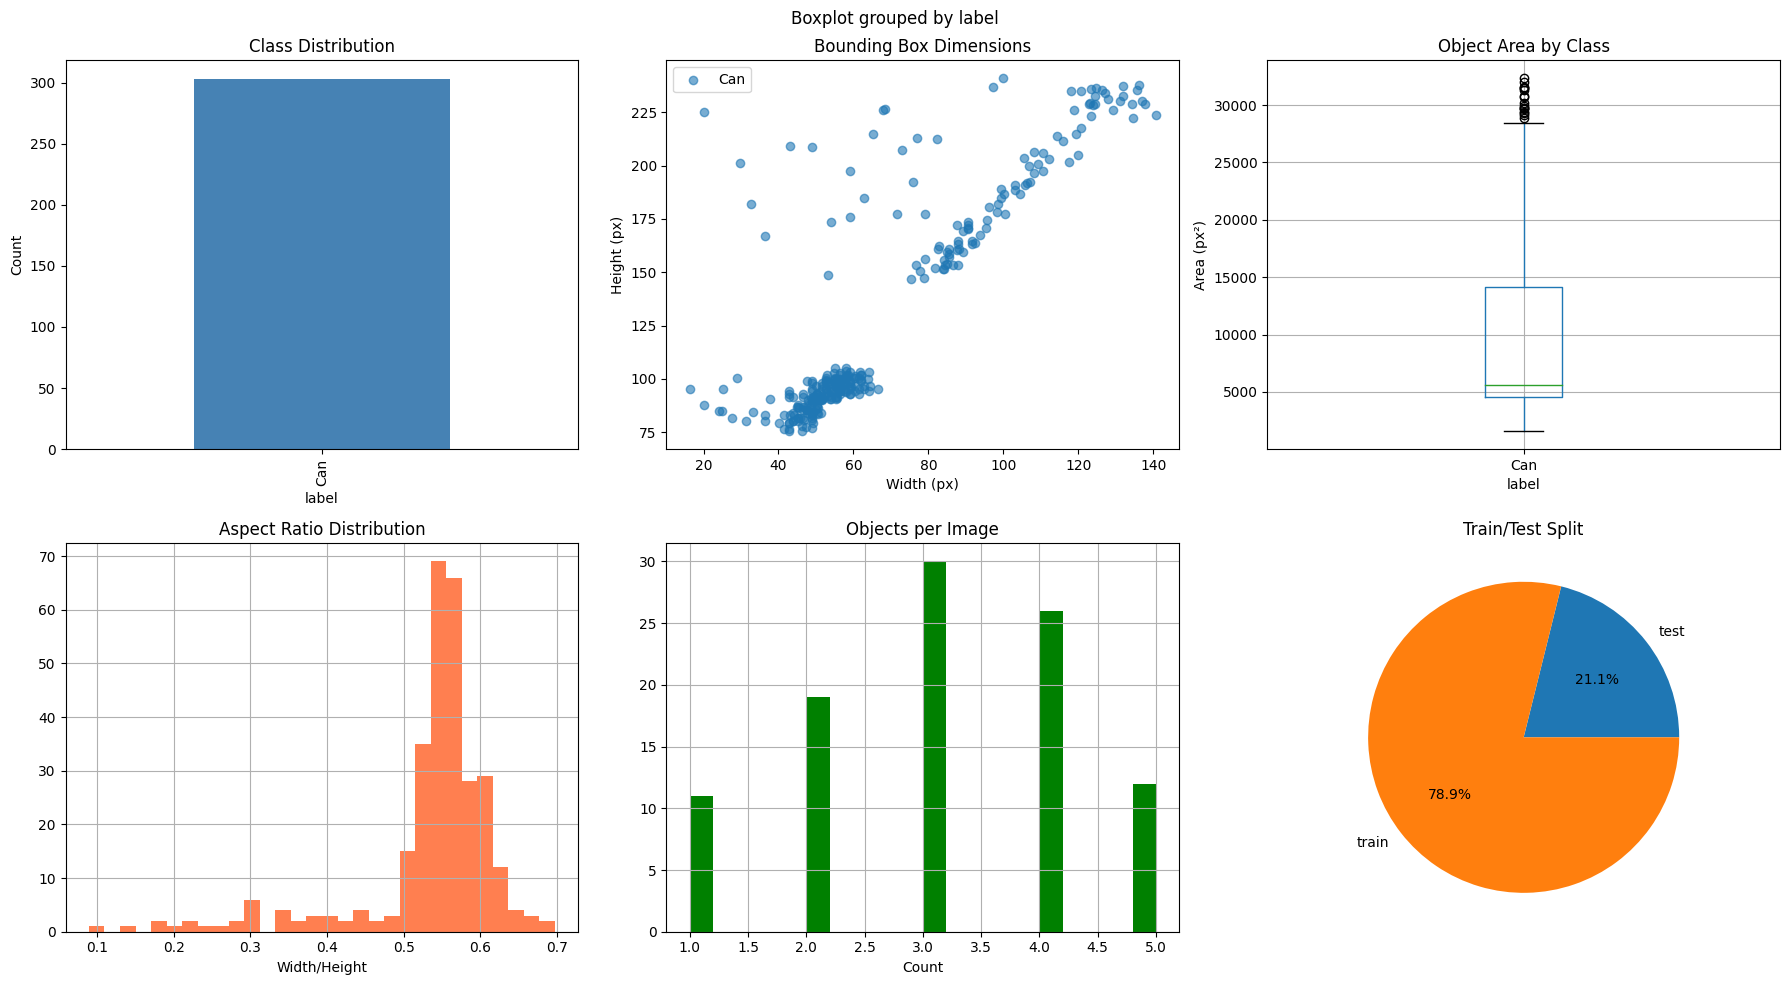

EDA for Object_Detection_Cubes

Dataset Statistics:
Total images: 629
Train images: 501
Test images: 128
Total bounding boxes: 2828
Average boxes per image: 4.50

Class Distribution:
label  blue  green  red  yellow
split                          
test    156    122  125     160
train   610    487  512     656

Bounding Box Size Statistics:
        width                                                          height  \
        count        mean        std   min    25%    50%    75%    max  count   
label                                                                           
blue    766.0  145.080940  25.539332  62.0  133.0  143.0  160.0  442.0  766.0   
green   609.0  134.505783  23.210061  70.0  123.0  131.0  142.0  423.0  609.0   
red     637.0  146.273155  23.086809  67.0  133.0  145.0  162.0  364.0  637.0   
yellow  816.0  146.334559  23.849262  78.0  132.0  145.0  161.0  408.0  816.0   

                    ...                 area                             \
              m

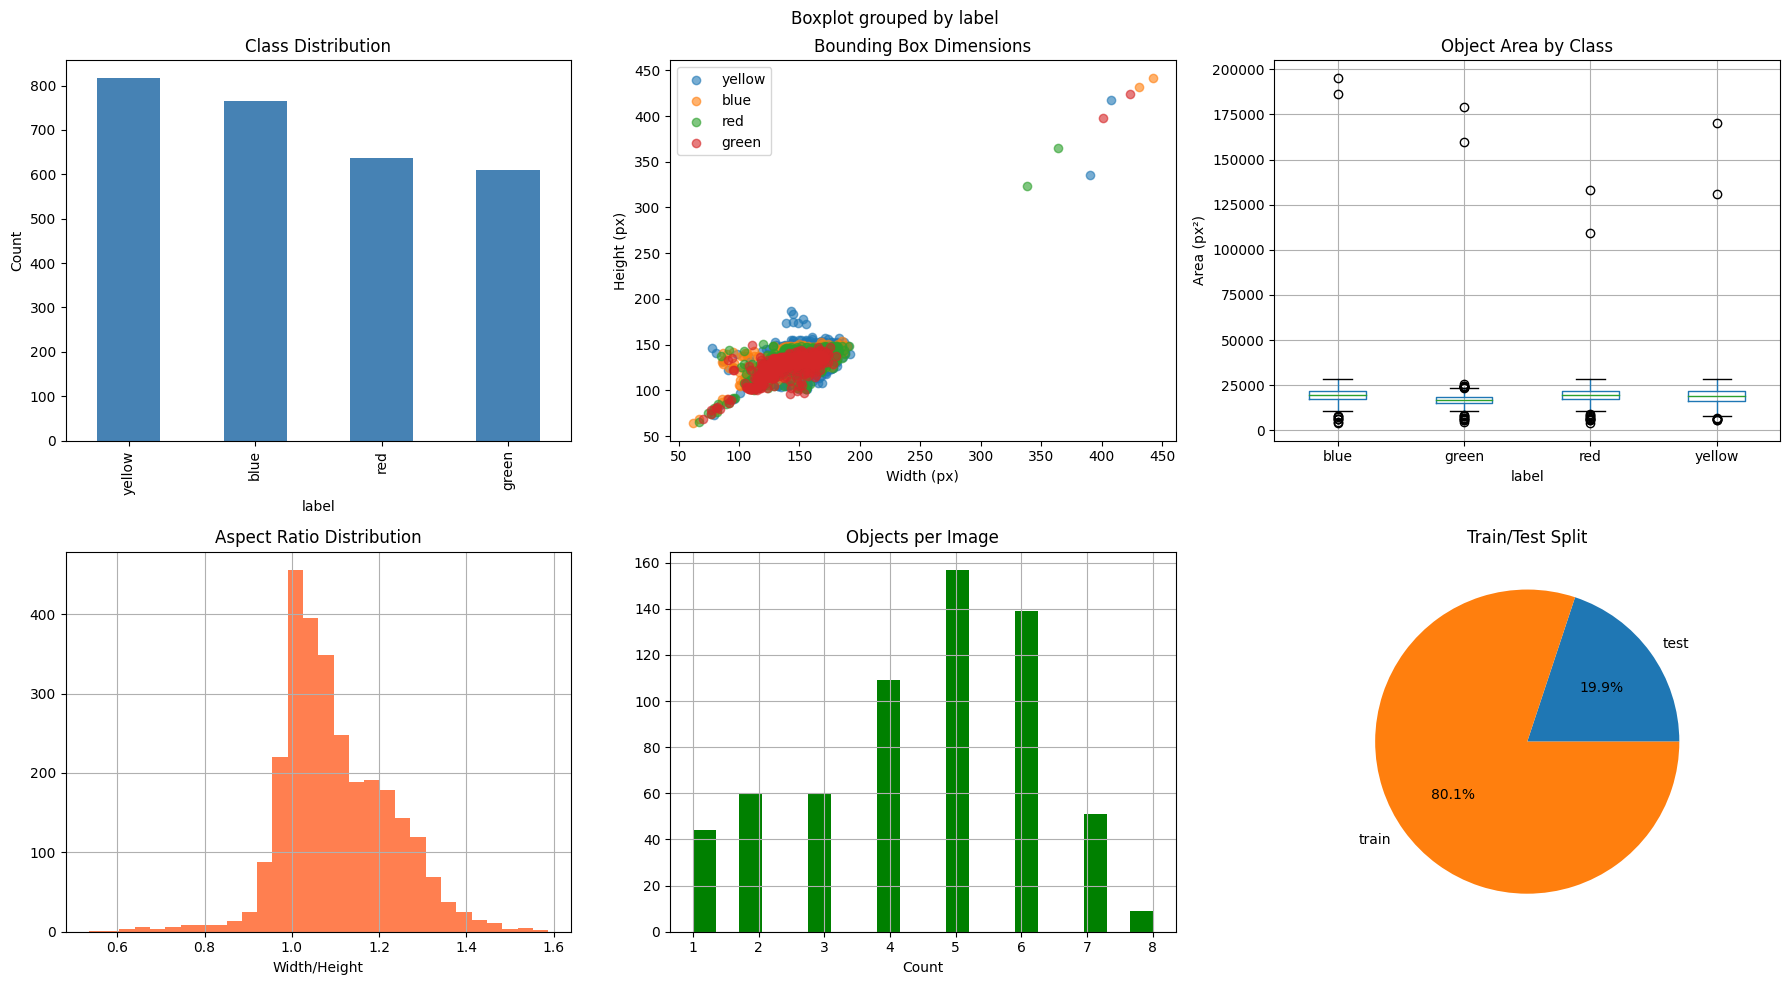

EDA for Object_Detection_SelfAttention

Dataset Statistics:
Total images: 50
Train images: 48
Test images: 2
Total bounding boxes: 50
Average boxes per image: 1.00

Class Distribution:
label  left  right
split             
test      1      1
train    24     24

Bounding Box Size Statistics:
      width                                                             \
      count        mean        std         min         25%         50%   
label                                                                    
left   25.0  130.449602  13.634009  103.898051  122.788606  128.185907   
right  25.0  132.369881  15.428166  101.000000  124.137931  132.000000   

                              height              ...                          \
              75%         max  count        mean  ...         75%         max   
label                                             ...                           
left   140.329835  160.569715   25.0  129.862903  ...  136.281859  148.425787   
right  140.82

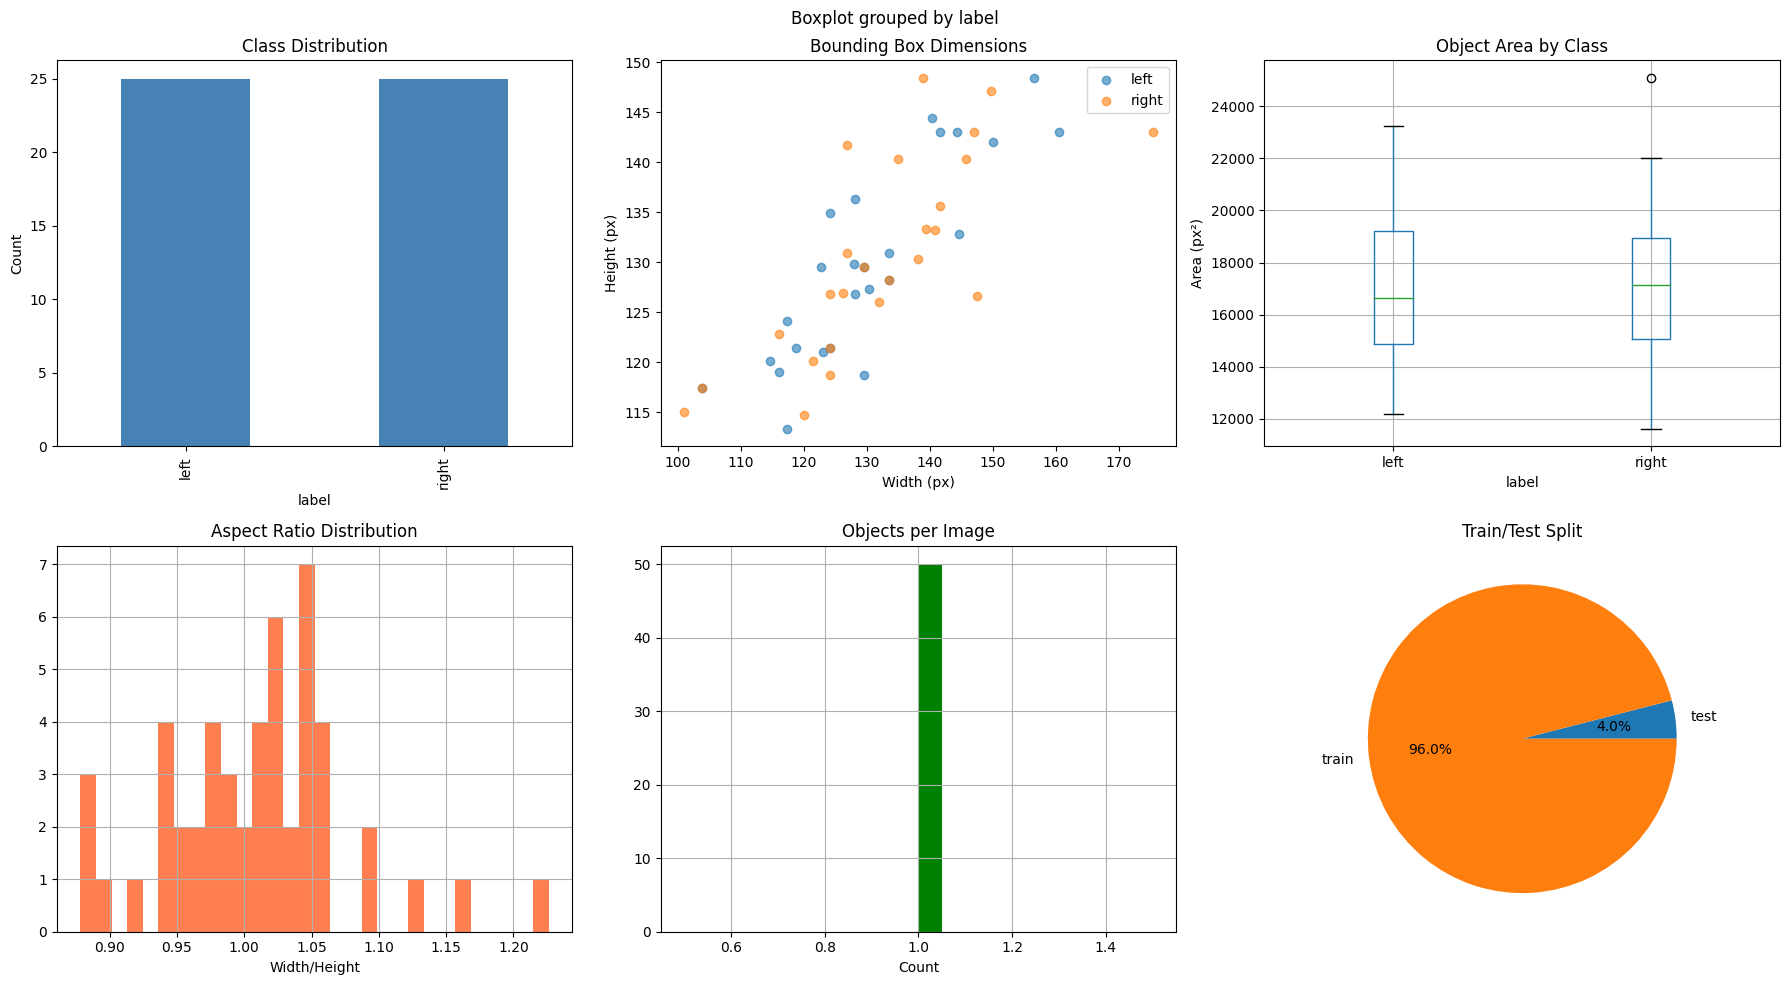

EDA for Glass_Breaking

Dataset Statistics:
Total audio files: 1272
Train samples: 1017
Test samples: 255

Class Distribution:
label
Background        1201
Glass_Breaking      71
Name: count, dtype: int64


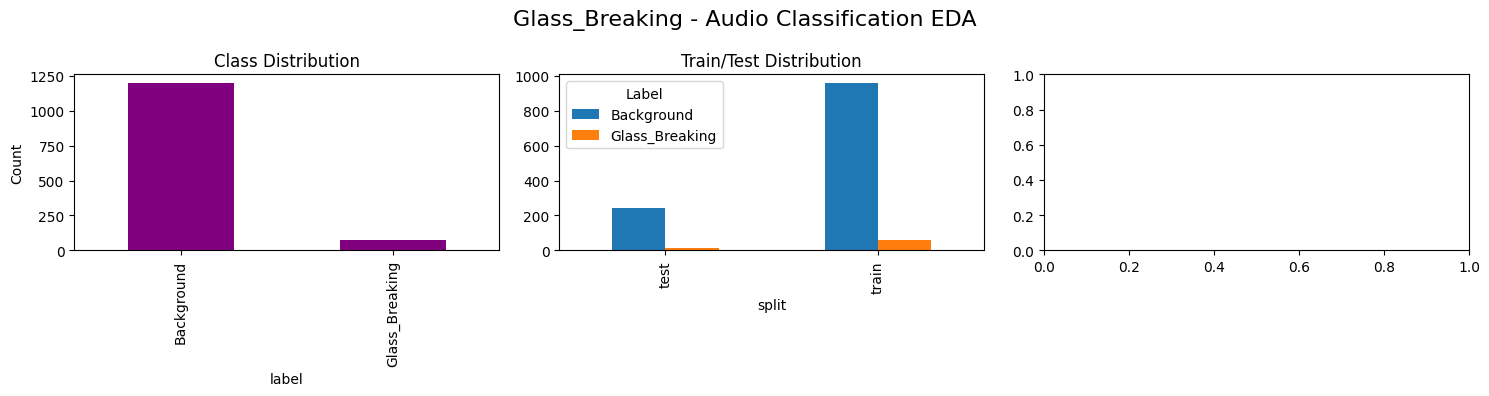

EDA for Visual_Anomaly_DHT11

Dataset Statistics:
Total images: 195
Train images: 136
Test images: 59

Class Distribution:
label  anomaly  no anomaly
split                     
test        39          20
train        0         136

Class Imbalance Ratio: 4.00:1


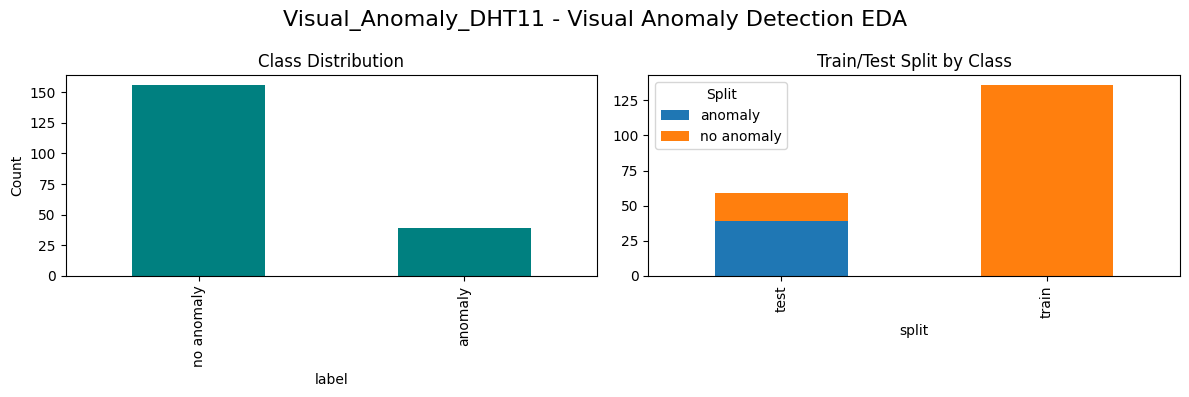

SUMMARY REPORT - All Edge Impulse Datasets

Object_Detection_Cans:
  - Total samples: 303
  - Unique labels: 1
  - Labels: ['Can']

Object_Detection_Cubes:
  - Total samples: 2828
  - Unique labels: 4
  - Labels: ['yellow', 'blue', 'red', 'green']

Object_Detection_SelfAttention:
  - Total samples: 50
  - Unique labels: 2
  - Labels: ['left', 'right']

Glass_Breaking:
  - Total samples: 1272
  - Unique labels: 2
  - Labels: ['Glass_Breaking', 'Background']

Visual_Anomaly_DHT11:
  - Total samples: 195
  - Unique labels: 2
  - Labels: ['no anomaly', 'anomaly']


In [ ]:
#  EDA for all datasets
results = {}

# Object Detection datasets
for name in ['Object_Detection_Cans', 'Object_Detection_Cubes', 'Object_Detection_SelfAttention']:
    results[name] = eda_object_detection(name, datasets[name])

# Audio Classification
results['Glass_Breaking'] = eda_audio_classification('Glass_Breaking', datasets['Glass_Breaking'])

# Visual Anomaly Detection
results['Visual_Anomaly_DHT11'] = eda_visual_anomaly('Visual_Anomaly_DHT11', datasets['Visual_Anomaly_DHT11'])

# summary report
print("SUMMARY REPORT - All Edge Impulse Datasets")

for dataset_name, df in results.items():
    print(f"\n{dataset_name}:")
    print(f"  - Total samples: {len(df)}")
    print(f"  - Unique labels: {df['label'].nunique()}")
    print(f"  - Labels: {list(df['label'].unique())}")
